# Задание 4 практикум Титушин - Тишина - Суроева

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('production-data.csv')
df

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1.0,1,1,103.0,0.0,harpy.co
1,1.0,1,2,0.0,2.0,harpy.co
2,1.0,1,3,0.0,4.0,harpy.co
3,1.0,1,4,0.0,5.0,harpy.co
4,1.0,1,5,0.0,13.0,harpy.co
...,...,...,...,...,...,...
2695,100.0,5,5,109.0,0.0,westeros.inc
2696,100.0,5,6,0.0,11.0,westeros.inc
2697,100.0,5,7,0.0,6.0,westeros.inc
2698,100.0,6,6,110.0,0.0,westeros.inc


In [23]:
filter_harpy = (df['supplier'] == 'harpy.co')
filter_westeros = (df['supplier'] == 'westeros.inc')

produced_harpy = np.zeros(6)
produced_westeros = np.zeros(6)
defects_harpy = np.zeros(6)
defects_westeros = np.zeros(6)

for month in range(1, 7):
    produced_harpy[month - 1] = df[filter_harpy & (df['production.date'] == (month))]['produced'].sum()
    produced_westeros[month - 1] = df[filter_westeros & (df['production.date'] == (month))]['produced'].sum()
    defects_harpy[month - 1] = df[filter_harpy & (df['report.date'] == (month))]['defects'].sum()
    defects_westeros[month - 1] = df[filter_westeros & (df['report.date'] == (month))]['defects'].sum()
print("1 месяц | 2 месяц | 3 месяц  | 4 месяц | 5 месяц | 6 месяц | Всего")
print("Произведено в Harpy & Co")
print(*produced_harpy, np.sum(produced_harpy))
print("Произведено в Westeros")
print(*produced_westeros, np.sum(produced_westeros))
print("Дефекты компании Harpy & Co")
print(*defects_harpy, np.sum(defects_harpy))
print("Дефекты компании Westeros")
print(*defects_westeros, np.sum(defects_westeros))

1 месяц | 2 месяц | 3 месяц  | 4 месяц | 5 месяц | 6 месяц | Всего
Произведено в Harpy & Co
5248.0 5256.0 5243.0 5282.0 5243.0 5260.0 31532.0
Произведено в Westeros
5280.0 5272.0 5298.0 5285.0 5263.0 5227.0 31625.0
Дефекты компании Harpy & Co
0.0 126.0 268.0 402.0 1180.0 1777.0 3753.0
Дефекты компании Westeros
0.0 449.0 852.0 1290.0 1573.0 1915.0 6079.0


In [24]:
print("Westeros Inc произвела всего больше мечей в", np.sum(produced_westeros) / np.sum(produced_harpy), "раз")
print("У Harpy & Co сломалось всего меньше мечей в", np.sum(defects_westeros) / np.sum(defects_harpy))

Westeros Inc произвела всего больше мечей в 1.002949384751998 раз
У Harpy & Co сломалось всего меньше мечей в 1.6197708499866774


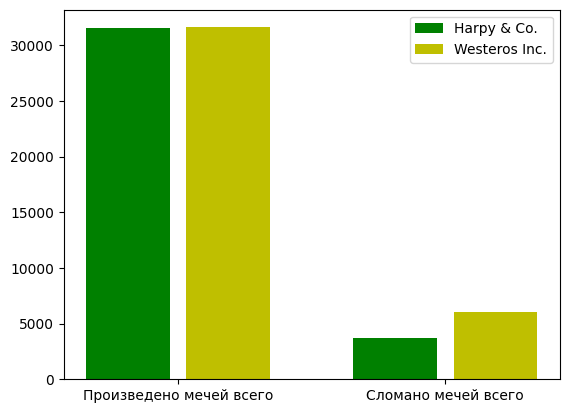

In [25]:
plt.bar([0, 0.8], [np.sum(produced_harpy), np.sum(defects_harpy)], color='g', width=0.25, label='Harpy & Co.')
plt.bar([0.3, 1.1], [np.sum(produced_westeros), np.sum(defects_westeros)], color='y', width=0.25, label='Westeros Inc.')
plt.xticks([0.15, 0.95], ['Произведено мечей всего', 'Сломано мечей всего'])
plt.legend()

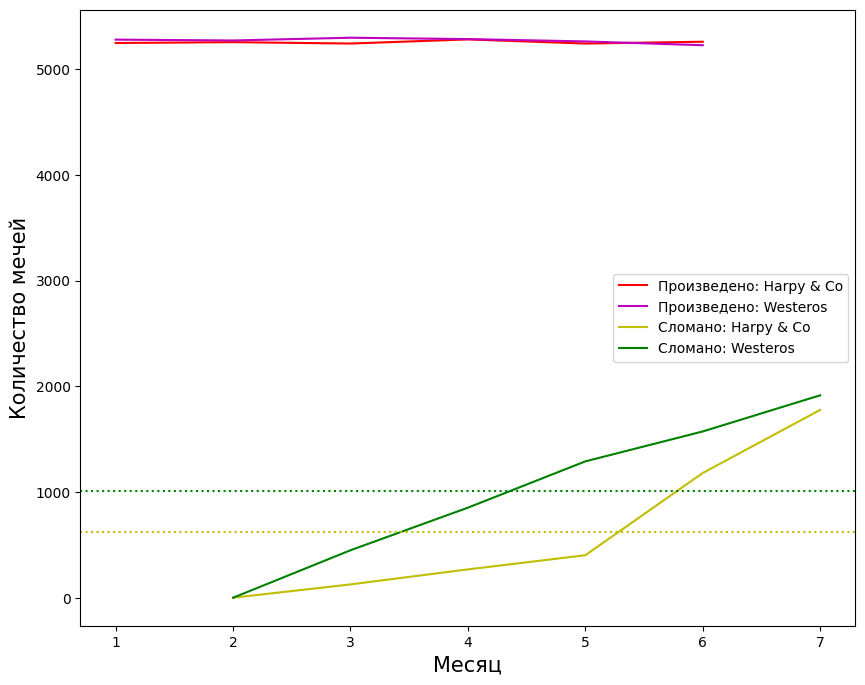

In [26]:
months_produced = np.array([1, 2, 3, 4, 5, 6])
months_defects = np.array([2, 3, 4, 5, 6, 7])

plt.figure(figsize = (10, 8))

plt.xlabel("Месяц", fontsize=15)
plt.ylabel("Количество мечей", fontsize=15)
plt.plot(months_produced, produced_harpy, c='r', label='Произведено: Harpy & Co')
plt.plot(months_produced, produced_westeros, c='m', label='Произведено: Westeros')
plt.plot(months_defects, defects_harpy, c='y', label='Сломано: Harpy & Co')
plt.plot(months_defects, defects_westeros, c='g', label='Сломано: Westeros')
plt.axhline(y=np.mean(defects_harpy), c='y', linestyle=':')
plt.axhline(y=np.mean(defects_westeros), c='g', linestyle=':')
plt.legend()

In [27]:
np.mean(produced_harpy)
np.mean(produced_westeros)

5270.833333333333

7.22772439983706
9.303246745088511
1.3598684210526317


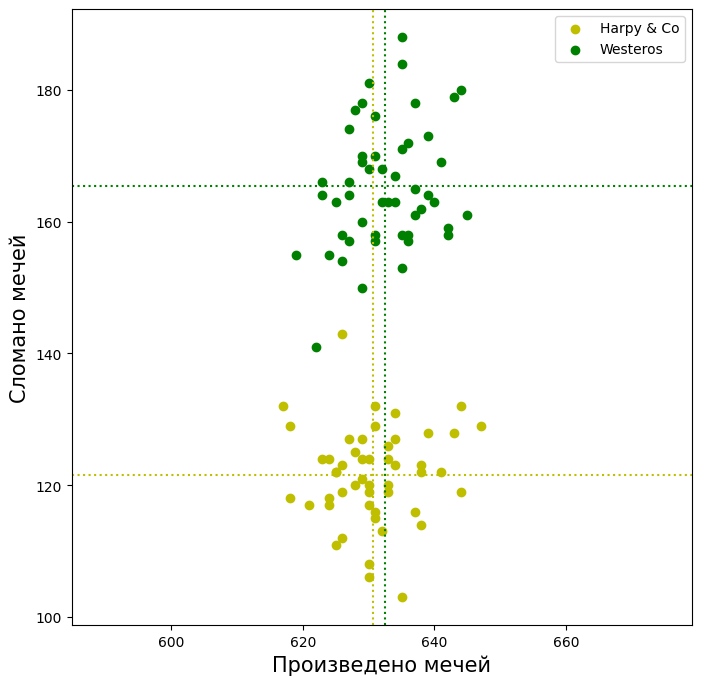

In [28]:
swords_produced = np.zeros(100)
swords_defects = np.zeros(100)

for i in range(100):
    swords_produced[i] = df[df['unsullen.id'] == (i + 1)]['produced'].sum()
    swords_defects[i] = df[df['unsullen.id'] == (i + 1)]['defects'].sum()

plt.figure(figsize =(8, 8))
plt.xlabel("Произведено мечей", fontsize=15)
plt.ylabel("Сломано мечей", fontsize=15)
plt.scatter(swords_produced[:50], swords_defects[:50], c='y', label='Harpy & Co')
plt.scatter(swords_produced[50:], swords_defects[50:], c='g', label='Westeros')
plt.axhline(y=np.mean(swords_defects[:50]), c='y', linestyle=':')
plt.axhline(y=np.mean(swords_defects[50:]), c='g', linestyle=':')
plt.axvline(x=np.mean(swords_produced[:50]), c='y', linestyle=':')
plt.axvline(x=np.mean(swords_produced[50:]), c='g', linestyle=':')
plt.axis('equal')
plt.legend()

print(np.std(swords_defects[:50]))
print(np.std(swords_defects[50:]))
print(np.mean(swords_defects[50:]) / np.mean(swords_defects[:50]))